In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'Dataset/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [3]:
cnn = tf.keras.models.load_model('trained_model.h5')

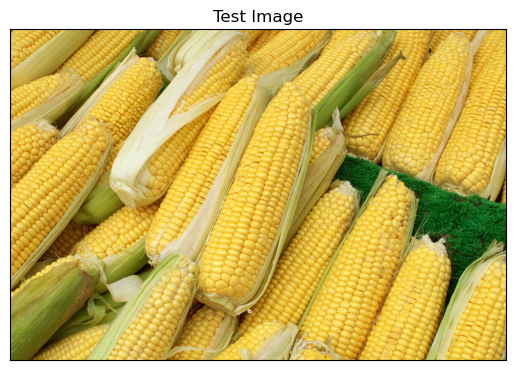

In [5]:
import cv2
image_path = 'Dataset/test/corn/Image_1.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [6]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 224ms/step


In [7]:
print(predictions)

[[2.15357246e-10 2.50408561e-07 1.15484271e-15 5.60300105e-11
  2.13442222e-10 2.89404715e-11 2.19781699e-13 1.63526159e-09
  3.82099401e-08 9.45255756e-01 6.52951027e-09 1.59747798e-13
  3.39485173e-09 2.52742471e-09 1.27989939e-08 2.48411638e-08
  2.83043619e-07 3.69714598e-06 4.24017245e-12 4.75974771e-09
  3.30804329e-12 7.94742105e-10 2.23932574e-11 3.55458297e-07
  4.14090262e-10 1.18134025e-07 8.20338175e-16 2.05162443e-10
  1.07715192e-09 5.54145004e-07 5.44181644e-10 5.47388569e-02
  6.50367217e-12 8.70133840e-14 2.28310190e-10 5.56819124e-09]]


In [8]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

9


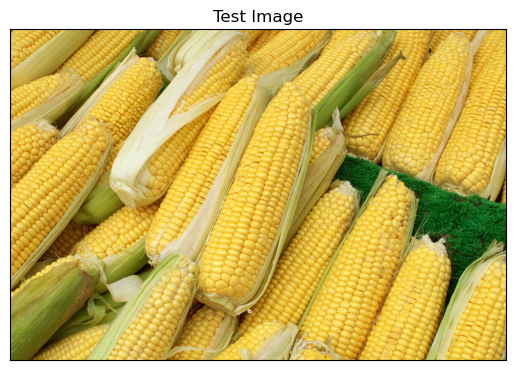

In [9]:
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [10]:
print("It's a {}".format(test_set.class_names[result_index]))

It's a corn
